In [6]:
import pandas as pd
df = pd.read_csv('online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
df.isnull().sum()
df.dropna(inplace=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

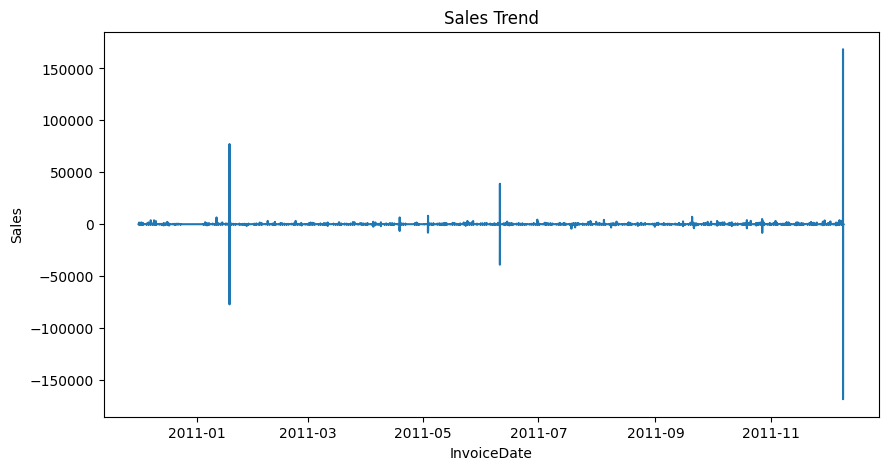

In [21]:
# EDA

import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.title("Sales Trend")
plt.plot(df['InvoiceDate'],df['Sales'])

plt.xlabel('InvoiceDate')
plt.ylabel("Sales")
plt.show()

In [17]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [24]:
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

In [25]:
from sklearn.model_selection import train_test_split

X = df[['Month', 'Year']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)

MAE: 19.656909541325966


In [28]:
future = pd.DataFrame({
    'Month': [1,2,3],
    'Year': [2026,2026,2026]
})

future_sales = model.predict(future)
future_sales

array([-1.21589705, -1.48771703, -1.75953701])

In [32]:
daily_sales = (
    df
    .groupby(df['InvoiceDate'].dt.date)['Sales']
    .sum()
    .reset_index()
)

daily_sales.columns = ['Date', 'Sales']
daily_sales.head()

,Date,Sales
0,2010-12-01,46051.26
1,2010-12-02,45775.43
2,2010-12-03,22598.46
3,2010-12-05,31380.60
4,2010-12-06,30465.08


In [33]:
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

In [34]:
daily_sales = daily_sales.sort_values('Date')
daily_sales.set_index('Date', inplace=True)
daily_sales.head()

,Sales
Date,
2010-12-01,46051.26
2010-12-02,45775.43
2010-12-03,22598.46
2010-12-05,31380.60
2010-12-06,30465.08


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("online_retail.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


df['Sales'] = df['Quantity'] * df['UnitPrice']


daily_sales = (
    df.groupby(df['InvoiceDate'].dt.date)['Sales']
    .sum()
    .reset_index()
)

daily_sales.columns = ['Date', 'Sales']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])


daily_sales = daily_sales.sort_values('Date')
daily_sales.set_index('Date', inplace=True)

daily_sales.head()

,Sales
Date,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-05,31383.95
2010-12-06,53860.18


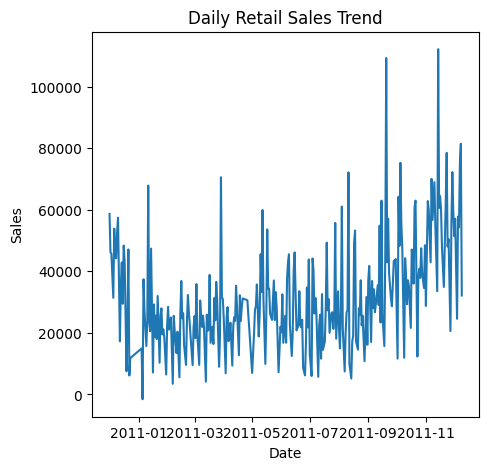

In [51]:
plt.figure(figsize=(5,5))
plt.plot(daily_sales.index, daily_sales['Sales'])
plt.title("Daily Retail Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

C:\Users\sinmo\AppData\Local\Temp\ipykernel_5224\2696404033.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.resample('M').sum()


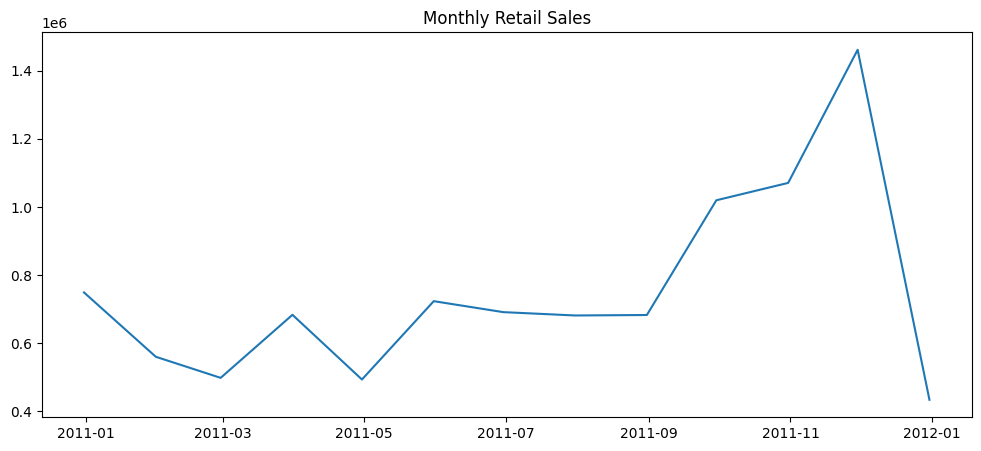

In [53]:
monthly_sales = daily_sales.resample('M').sum()

plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales['Sales'])
plt.title("Monthly Retail Sales")
plt.show()

In [38]:
train = daily_sales.iloc[:-30]
test = daily_sales.iloc[-30:]

C:\Users\sinmo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sinmo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sinmo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sinmo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given wit

In [42]:
from statsmodels.tsa.arima.model import ARIMA
print("ARIMA is ready")

ARIMA is ready


In [43]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train['Sales'], order=(5,1,0))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=30)

C:\Users\sinmo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sinmo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sinmo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sinmo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given wit

In [44]:
from sklearn.metrics import mean_absolute_error

arima_mae = mean_absolute_error(test['Sales'], arima_forecast)
print("ARIMA MAE:", arima_mae)

ARIMA MAE: 14722.863485821288


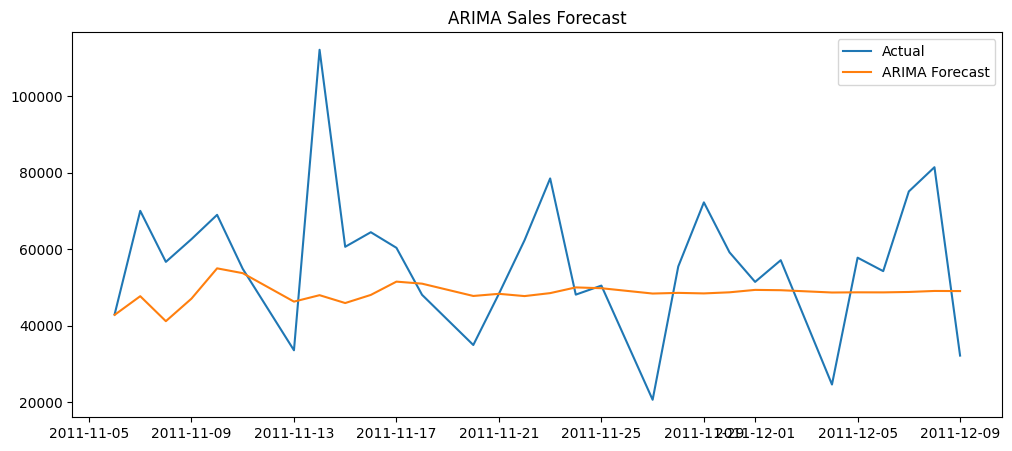

In [45]:
plt.figure(figsize=(12,5))
plt.plot(test.index, test['Sales'], label="Actual")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Sales Forecast")
plt.show()

In [46]:
from prophet import Prophet

prophet_df = daily_sales.reset_index()
prophet_df.columns = ['ds', 'y']


In [47]:
prophet_model = Prophet()
prophet_model.fit(prophet_df)

00:06:36 - cmdstanpy - INFO - Chain [1] start processing
00:06:37 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = prophet_model.make_future_dataframe(periods=90)
forecast = prophet_model.predict(future)

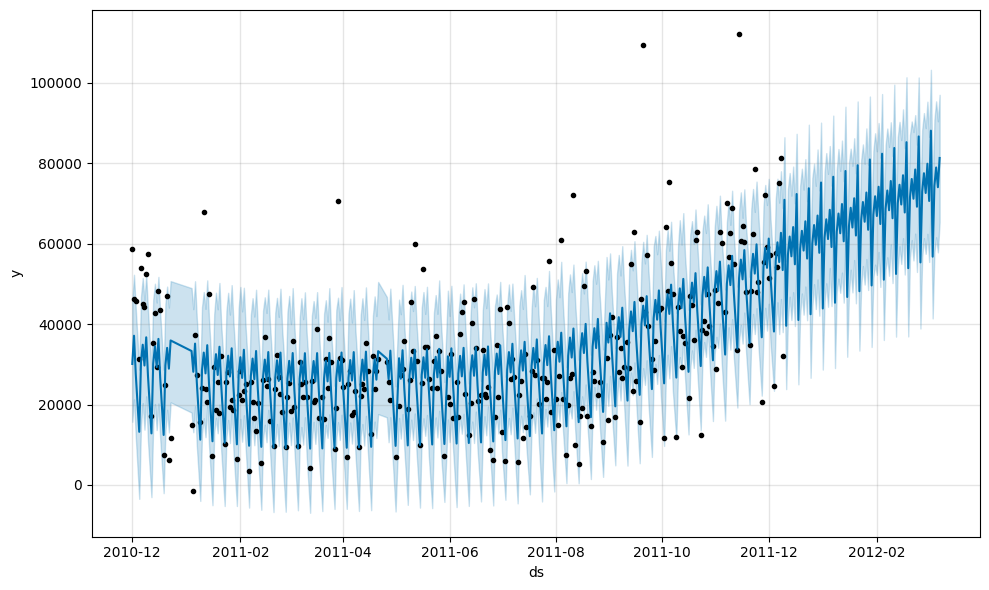

In [49]:
prophet_model.plot(forecast)
plt.show()

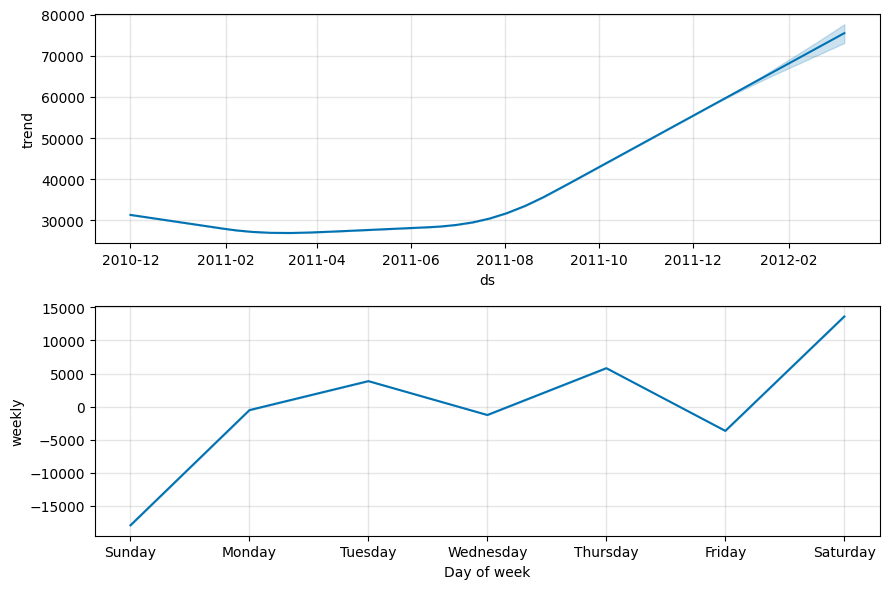

In [50]:
prophet_model.plot_components(forecast)
plt.show()